# Binary data representation

Write a code, which, using [2's complement](https://en.wikipedia.org/wiki/Two%27s_complement) will represent numbers `-2` and `6` in 4-bit encoding (separately!).

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
import matplotlib.pyplot as plt

In [4]:
qr = QuantumRegister(4, 'qubits')
cr = ClassicalRegister(4, 'bits')
qc = QuantumCircuit(qr, cr)

# write your code here 

# qc.x([0, 1, 2])
# -2 = ~(2) + 1 = ~0010 + 1 = 1101 + 1 = 1110
qc.x([1, 2, 3])

qc.measure(qr, cr)

Validate your code produces exaclty what you planned

In [3]:
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)
plt.show()

# Increment implementation

## Preparation. Multicontrol

Genetalization of controlled gates is [MCMT](https://qiskit.org/documentation/stubs/qiskit.circuit.library.MCMT.html). But we can do it easier, with standard gates. Up to 3 there are [even classes](https://qiskit.org/documentation/stubs/qiskit.circuit.library.C3XGate.html#qiskit.circuit.library.C3XGate). Or you can go with `XGate`.

In [5]:
qr = QuantumRegister(4, 'qubits')
cr = ClassicalRegister(4, 'bits')
qc = QuantumCircuit(qr, cr)

qc.x([0, 1, 2])
qc.mct(qr[:3], qr[-1])
qc.measure(qr, cr)
display(qc.draw())

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)
plt.show()

┌───┐     ┌─┐         
qubits_0: ┤ X ├──■──┤M├─────────
          ├───┤  │  └╥┘┌─┐      
qubits_1: ┤ X ├──■───╫─┤M├──────
          ├───┤  │   ║ └╥┘┌─┐   
qubits_2: ┤ X ├──■───╫──╫─┤M├───
          └───┘┌─┴─┐ ║  ║ └╥┘┌─┐
qubits_3: ─────┤ X ├─╫──╫──╫─┤M├
               └───┘ ║  ║  ║ └╥┘
  bits: 4/═══════════╩══╩══╩══╩═
                     0  1  2  3

## Simple increment

In [6]:
qr = QuantumRegister(4, 'qubits')
cr = ClassicalRegister(4, 'bits')
qc = QuantumCircuit(qr, cr)

qc.x([0, 2])
qc.barrier()

################ YOUR CODE HERE #########################
qc.mct([0, 1, 2], 3)
qc.ccx(0, 1, 2)
qc.cx(0, 1)
qc.x(0)
qc.barrier()
qc.measure(qr, cr)
display(qc.draw())

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)
plt.show()

┌───┐ ░                ┌───┐ ░ ┌─┐         
qubits_0: ┤ X ├─░───■────■────■──┤ X ├─░─┤M├─────────
          └───┘ ░   │    │  ┌─┴─┐└───┘ ░ └╥┘┌─┐      
qubits_1: ──────░───■────■──┤ X ├──────░──╫─┤M├──────
          ┌───┐ ░   │  ┌─┴─┐└───┘      ░  ║ └╥┘┌─┐   
qubits_2: ┤ X ├─░───■──┤ X ├───────────░──╫──╫─┤M├───
          └───┘ ░ ┌─┴─┐└───┘           ░  ║  ║ └╥┘┌─┐
qubits_3: ──────░─┤ X ├────────────────░──╫──╫──╫─┤M├
                ░ └───┘                ░  ║  ║  ║ └╥┘
  bits: 4/════════════════════════════════╩══╩══╩══╩═
                                          0  1  2  3

## What about increment of superposition?

Prepare superposition of `-2` and `6` and apply increment to them.

HINT: $\frac{1}{\sqrt{2}}(|0110\rangle+|1110\rangle)$. What's common?

░                ┌───┐ ░ ┌─┐         
qubits_0: ──────░───■────■────■──┤ X ├─░─┤M├─────────
          ┌───┐ ░   │    │  ┌─┴─┐└───┘ ░ └╥┘┌─┐      
qubits_1: ┤ X ├─░───■────■──┤ X ├──────░──╫─┤M├──────
          ├───┤ ░   │  ┌─┴─┐└───┘      ░  ║ └╥┘┌─┐   
qubits_2: ┤ X ├─░───■──┤ X ├───────────░──╫──╫─┤M├───
          ├───┤ ░ ┌─┴─┐└───┘           ░  ║  ║ └╥┘┌─┐
qubits_3: ┤ H ├─░─┤ X ├────────────────░──╫──╫──╫─┤M├
          └───┘ ░ └───┘                ░  ║  ║  ║ └╥┘
  bits: 4/════════════════════════════════╩══╩══╩══╩═
                                          0  1  2  3

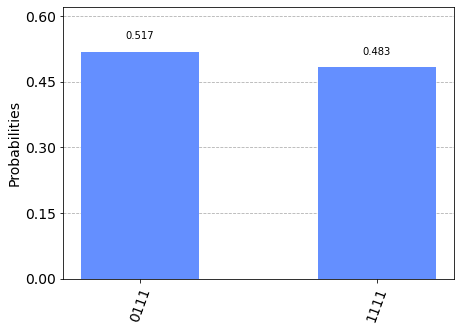

In [7]:
qr = QuantumRegister(4, 'qubits')
cr = ClassicalRegister(4, 'bits')
qc = QuantumCircuit(qr, cr)

# middle
qc.x([1, 2])
qc.h(3)

qc.barrier()

qc.mct([0, 1, 2], 3)
qc.ccx(0, 1, 2)
qc.cx(0, 1)
qc.x(0)


qc.barrier()
qc.measure(qr, cr)
display(qc.draw())

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)
